In [3]:
import pandas as pd
import time
import random
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report,recall_score,precision_score,roc_auc_score
from sklearn.linear_model import LogisticRegression #LogisticRegression
from sklearn.tree import DecisionTreeClassifier #DecisionTreeRegresor
from sklearn.ensemble import RandomForestClassifier  # RandomForestRegressor
from sklearn.ensemble import AdaBoostClassifier #Adaptive Boost
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.ensemble import GradientBoostingClassifier #Gradient Boost 
from sklearn.svm import SVC #SVC
from sklearn.naive_bayes import GaussianNB #NaiveBayes
from IPython.display import Image  
from sklearn.tree import export_graphviz
from io import StringIO
import warnings
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_csv(r"C:\Users\kisho\DataScience\Machine Learning\Practice\cat2.csv")

In [5]:
data.head()

,Unnamed: 0,online_booking,mobile_site_booking,Car_Cancellation,from_month,from_datee,weekend,timeOfDay,timeDifference,distance,from_cancel_zone,to_cancel_zone
0,0,0,0,0,1,1,0,6,1,8016,1,1
1,1,0,0,0,1,1,0,2,7,8015,1,1
2,2,0,0,0,1,1,0,6,0,8009,1,1
3,3,0,0,0,1,1,0,1,1,8003,1,0
4,4,0,0,0,1,1,0,2,2,8024,1,1


In [6]:
data = data.drop('Unnamed: 0',axis=1)
data.head(3)

,online_booking,mobile_site_booking,Car_Cancellation,from_month,from_datee,weekend,timeOfDay,timeDifference,distance,from_cancel_zone,to_cancel_zone
0,0,0,0,1,1,0,6,1,8016,1,1
1,0,0,0,1,1,0,2,7,8015,1,1
2,0,0,0,1,1,0,6,0,8009,1,1


In [7]:
data.shape

(34292, 11)

In [8]:
data.columns

Index(['online_booking', 'mobile_site_booking', 'Car_Cancellation',
       'from_month', 'from_datee', 'weekend', 'timeOfDay', 'timeDifference',
       'distance', 'from_cancel_zone', 'to_cancel_zone'],
      dtype='object')

In [9]:
names =['online_booking', 'mobile_site_booking', 'Car_Cancellation',
       'from_month', 'from_datee', 'weekend', 'timeOfDay', 'timeDifference',
       'distance', 'from_cancel_zone', 'to_cancel_zone'],

dx = ['Cancel', 'notCancel']

In [10]:
X = data.loc[:,data.columns!='Car_Cancellation'].values
X

array([[   0,    0,    1, ..., 8016,    1,    1],
       [   0,    0,    1, ..., 8015,    1,    1],
       [   0,    0,    1, ..., 8009,    1,    1],
       ...,
       [   1,    0,   11, ..., 7986,    1,    1],
       [   0,    0,   11, ..., 8008,    1,    1],
       [   0,    1,   11, ..., 8005,    1,    1]], dtype=int64)

In [11]:
y = data.Car_Cancellation.values
y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [12]:
print("Shape of features set X: ",X.shape)
print("Shape of target Y: ",y.shape)

Shape of features set X:  (34292, 10)
Shape of target Y:  (34292,)


In [13]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [14]:
print("Data of training features: ",x_train.shape)
print("Data of testing features: ",x_test.shape)
print("\n")
print("Data of training target: ",y_train.shape)
print("Data of testing target: ",y_test.shape)

Data of training features:  (24004, 10)
Data of testing features:  (10288, 10)


Data of training target:  (24004,)
Data of testing target:  (10288,)


In [15]:
std_scaler = StandardScaler()
x_train = std_scaler.fit_transform(x_train)
x_test = std_scaler.fit_transform(x_test)
x_train

array([[ 1.31915983e+00, -2.26462845e-01, -8.34554842e-01, ...,
         5.60764328e-04,  1.56401644e-01,  1.17275296e-01],
       [-7.58058258e-01, -2.26462845e-01,  1.84158303e-01, ...,
         9.77538848e-01,  1.56401644e-01,  1.17275296e-01],
       [-7.58058258e-01, -2.26462845e-01, -8.34554842e-01, ...,
         8.68985728e-01,  1.56401644e-01,  1.17275296e-01],
       ...,
       [-7.58058258e-01, -2.26462845e-01, -4.94983794e-01, ...,
         4.34773246e-01,  1.56401644e-01,  1.17275296e-01],
       [ 1.31915983e+00, -2.26462845e-01, -1.85326799e+00, ...,
        -3.25098597e-01, -3.80379358e+00,  1.17275296e-01],
       [-7.58058258e-01, -2.26462845e-01,  1.84158303e-01, ...,
         8.68985728e-01,  1.56401644e-01,  1.17275296e-01]])

In [16]:
#Model Logistic Regression
model_logreg = LogisticRegression(random_state = 0)
model_logreg.fit(x_train,y_train)

LogisticRegression(random_state=0)

In [34]:
y_pred = model_logreg.predict(x_test)
y_pred[:150]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [36]:
y_test[:150]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [38]:
#performance metrics
conf_matrix_Logreg = confusion_matrix(y_test,y_pred)
conf_matrix_Logreg

array([[9409,   49],
       [ 776,   54]], dtype=int64)

<Axes: >

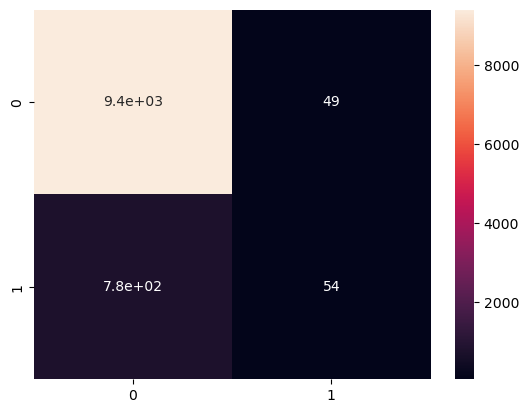

In [40]:
sns.heatmap(conf_matrix_Logreg,annot = True)

In [42]:
accuracy_logreg = metrics.accuracy_score(y_test,y_pred)
accuracy_logreg

0.9198094867807154

In [46]:
precision_logreg = metrics.precision_score(y_test,y_pred)
precision_logreg

0.5242718446601942

In [48]:
recall_logreg = metrics.recall_score(y_test,y_pred)
recall_logreg

0.06506024096385542

In [70]:
#AUC
y_pred_prob = model_logreg.predict_proba(x_test)[:,1]
y_pred_prob

array([0.07406284, 0.13086222, 0.13738121, ..., 0.11159015, 0.06158687,
       0.13278068])

In [77]:
auc_logreg = metrics.roc_auc_score(y_test,y_pred_prob)
auc_logreg

0.7920881665804687

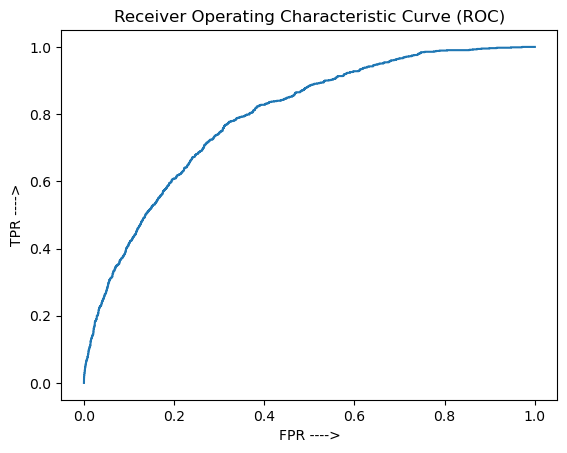

In [81]:
y_pred_proba = model_logreg.predict_proba(x_test)[:,1]
fpr,tpr,_=metrics.roc_curve(y_test,y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.title("Receiver Operating Characteristic Curve (ROC)")
plt.xlabel("FPR ---->")
plt.ylabel("TPR ---->")
plt.show()